<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/collect_sarcasm/collect_data_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài tập: Thu thập dataset cho bài toán Sarcasm detection in news headline**

#**Nhóm thực hiện**
- 19522020 - Lãi Nguyễn Vĩnh Phú
- 19521299 - Nguyễn Chí Cường
- 19522447 - Trương Thế Trương

#**Các trang web thu thập:**
Trang châm biếm:
- https://www.newyorker.com/
- https://dailybonnet.com/
- https://clickhole.com/
- https://chaser.com.au/

Trang chính thống:

- https://www.thetimes.co.uk/
- https://www.euronews.com/
- https://time.com

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#**Tin châm biếm**

## **Trang New Yorker**

In [ ]:
file_link = open("newyorker_link.txt","a")
file_head = open("newyorker_head.txt","a")
for page in range(400):
  link = "https://www.newyorker.com"
  url = "https://www.newyorker.com/latest/news/page/{}".format(page)
  try:
    response  = requests.get(url)

    html = response.content
    soup = BeautifulSoup(html, "html.parser")

    names = soup.body.find_all('li', class_="River__riverItem___3huWr")
    for element in names:
      link_new = element.a.attrs.get("href")
      if link_new is not None:
        file_link.write(link + str(link_new) + '\n')
        file_head.write(element.h4.get_text() + '\n')
  except:
      continue
file_link.close()
file_head.close()

##**Trang Daily Bonnet**

In [ ]:
url = 'https://dailybonnet.com/'
list_new = [['quiz/page/{}',12], ['mennonitelife/page/{}',169], ['food-and-drink/page/{}',78], ['church/page/{}',61], ['outsiders/page/{}',122]]
file_link = open("dailybonnet_link.txt","a")
file_head = open("dailybonnet_head.txt","a")
for text in list_new:
  link = url + 'category/' + text[0]
  for page in range(text[1]):
    try:
      new_url = link.format(page)
      names = soup.body.find_all('article')
      for index in names:
        file_link.write(str(index.h3.a.attrs.get('href')) + '\n')
        file_head.write(index.h3.text.strip() + '\n')
    except:
        continue
file_head.close()
file_link.close()    

##**Trang Click Hole**

In [ ]:
file_link = open("clickhole_link.txt","a")
file_head = open("clickhole_head.txt","a")
for page in range(1176):
  url = "https://clickhole.com/page/{}".format(page)
  try:
    response  = requests.get(url)

    html = response.content
    soup = BeautifulSoup(html, "html.parser")

    names = soup.body.find_all('li', class_="post-item has-image")
    for index in names:
      file_link.write(str(index.a.attrs.get('href')) + '\n')
      file_head.write(index.a.text + '\n')
  except:
      continue
file_link.close()
file_head.close()

##**Trang The Chaser**

In [ ]:
file_link = open("chaser_link.txt","a")
file_head = open("chaser_head.txt","a")

for page in range(209):
  url = 'https://chaser.com.au/news/page/{}'.format(page)
  try:
    response  = requests.get(url)

    html = response.content
    soup = BeautifulSoup(html, "html.parser")

    names = soup.body.find_all('a', class_="archive_story")
    for index in names:
      file_link.write(str(index.attrs.get('href') + '\n'))
      file_head.write(index.text.strip().split('\n\n')[1].strip() + '\n')
  except:
    continue
file_link.close()
file_head.close()

#**Tin chính thống**

##**Trang The Time**

In [ ]:
file_link = open("thetimes_link.txt","a")
file_head = open("thetimes_head.txt","a")
zp = [['uk-politics', 200], ['economics', 200], ['health', 100], ['television', 100]]
url = 'https://www.thetimes.co.uk/topic/'
for tag in zp:
  for page in range(tag[1]):
    link = (url + tag[0] + '?page={}').format(page)
    try:
      response = requests.get(link)
      html = response.content
      soup = BeautifulSoup(html, "html.parser")
      names = soup.body.find_all('div', class_="responsiveweb__ListContentContainer-sc-143eup1-0 isZXs responsiveweb__ListContentContainer-sc-143eup1-0 isZXs css-1dbjc4n")[1:]
      for index in names:
        file_link.write(str(index.a.attrs.get('href')) + '\n')
        file_head.write(index.h3.text + '\n')
    except:
      continue

file_link.close()
file_head.close()

## **Trang Euro News**

In [ ]:
zp = [['g7',4], ['climate-change',23],['covid-19',103],['china',58],
      ['video',8],['bitcoin',3],['travel-guide',3], ['joe-biden',12],
      ['ursula-von-der-leyen',6], ['asia',14], ['sport',60],
      ['culture',39], ['business',37]]
url = 'https://www.euronews.com/'
file_link = open("euronews_link.txt","a")
file_head = open("euronews_head.txt","a")
for tag in zp:
  for page in range(tag[1]):
    link = (url + 'tag/' + tag[0] + '?p={}').format(page)
    try:
      response = requests.get(link)
      html = response.content
      soup = BeautifulSoup(html, "html.parser")
      names = soup.body.find_all('article')[:30]
      for index in names:
        try:
          title = index.h3.text.strip()
        except:
          title = index.h2.text.strip()
        file_link.write(url + str(index.a.attrs.get('href')) + '\n')
        file_head.write(title + '\n')
    except:
      continue
file_link.close()
file_head.close()

##**Trang Time**

In [ ]:
file_link = open('time_link.txt', 'a')
file_head = open('time_head.txt', 'a')
url = 'https://time.com'
tag = ['world', 'politics', 'health', 'business', 'tech', 'entertainment', 'ideas', 'science', 'history', 'newsfeed', 'sports']
for word in tag:
  for page in range(250):
    link = (url + '/section/' + word + '/?page={}').format(page)
    try:
      response = requests.get(link)
      html = response.content
      soup = BeautifulSoup(html, "html.parser")
      names = soup.body.find_all('article')
      for index in names:
        file_link.write(url + str(index.a.attrs.get('href')) + '\n')
        file_head.write(index.h3.text.strip() + '\n')
    except:
      continue

file_head.close()
file_link.close()

#**Tạo file CSV**

In [ ]:
def to_dateframe(_namefile, num):
  type_file = ['head', 'link']
  list_file = []
  for name in _namefile:
    temp = []
    for tpe in type_file:
      file = open(name + '_' + tpe + '.txt', 'r')
      series = pd.Series(file.read().split('\n'))
      temp.append(series)
    list_file.append(temp)

  list_names = []
  for df in list_file:
    dct = {'headline': df[0], 'article_link': df[1]}
    df_temp = pd.DataFrame(dct)
    list_names.append(df_temp)

  dct = pd.concat(list_names)
  dct = dct.reset_index()
  dct['is_sarcastic'] = num
  del dct['index']
  return dct

##**Sarcasm**

In [ ]:
name_list = ['chaser', 'clickhole', 'newyorker', 'dailybonnet']
df_sarcasm = to_dateframe(name_list, 1)
df_sarcasm

,headline,article_link,is_sarcastic
0,Labor pledges to double their heart-felt state...,https://chaser.com.au/general-news/labor-pledg...,1
1,Morrison asks Queen if she’s a lizard,https://chaser.com.au/national/morrison-asks-q...,1
2,Order of Australia recipient Peta Credlin hono...,https://chaser.com.au/general-news/order-of-au...,1
3,PM fucking off to Hawaii during fires somehow ...,https://chaser.com.au/national/pm-fucking-off-...,1
4,Local MP only got into politics so they could ...,https://chaser.com.au/national/local-mp-only-g...,1
...,...,...,...
18584,Vaccine “Lottery” Rebranded as Vaccine “Quilt ...,https://dailybonnet.com/vaccine-lottery-rebran...,1
18585,Manitoba’s Vaccine Passport Only Good for Trip...,https://dailybonnet.com/manitobas-vaccine-pass...,1
18586,Winkler Pastor Finally Approves Going for Shot...,https://dailybonnet.com/winkler-pastor-finally...,1
18587,Angry White Man Reports on All the Horrible At...,https://dailybonnet.com/angry-white-man-thinks...,1


##**Non-Sarcasm**

In [ ]:
name_news = ['thetimes', 'time', 'euronews']
df_realNews = to_dateframe(name_news, 0)
df_realNews

,headline,article_link,is_sarcastic
0,Lib Dems take Tory seat in by-election upset,https://www.thetimes.co.uk/article/chesham-and...,0
1,Flurry of fizz and a vintage performance,https://www.thetimes.co.uk/article/quentin-let...,0
2,Johnson wants to jolt commuters back to work,https://www.thetimes.co.uk/article/boris-johns...,0
3,Time for a local vision of levelling up,https://www.thetimes.co.uk/article/time-for-a-...,0
4,Proliferation of sexual violence in conflict m...,https://www.thetimes.co.uk/article/proliferati...,0
...,...,...,...
36295,Taking business into Welsh schools,https://www.euronews.com//next/2012/10/01/taki...,0
36296,Women entrepreneurs could be answer to crisis,https://www.euronews.com//next/2012/09/21/wome...,0
36297,Branson's grim train warning,https://www.euronews.com//2012/08/15/branson-s...,0
36298,Business parties in Swedish countryside,https://www.euronews.com//next/2012/07/24/busi...,0


In [ ]:
full_data = pd.concat([df_sarcasm, df_realNews]).reset_index()
del full_data['index']
full_data

,headline,article_link,is_sarcastic
0,Labor pledges to double their heart-felt state...,https://chaser.com.au/general-news/labor-pledg...,1
1,Morrison asks Queen if she’s a lizard,https://chaser.com.au/national/morrison-asks-q...,1
2,Order of Australia recipient Peta Credlin hono...,https://chaser.com.au/general-news/order-of-au...,1
3,PM fucking off to Hawaii during fires somehow ...,https://chaser.com.au/national/pm-fucking-off-...,1
4,Local MP only got into politics so they could ...,https://chaser.com.au/national/local-mp-only-g...,1
...,...,...,...
54884,Taking business into Welsh schools,https://www.euronews.com//next/2012/10/01/taki...,0
54885,Women entrepreneurs could be answer to crisis,https://www.euronews.com//next/2012/09/21/wome...,0
54886,Branson's grim train warning,https://www.euronews.com//2012/08/15/branson-s...,0
54887,Business parties in Swedish countryside,https://www.euronews.com//next/2012/07/24/busi...,0


##**Save File**

In [ ]:
full_data.to_csv('sarcasm_dataset.csv')
full_data.to_json('sarcasm_dataset.json')

#**Thu thập dữ liệu test**

2 trang châm biếm và 2 trang chính thống

##**Trang châm biếm**

> https://thehardtimes.net/

In [ ]:
file_link = open("thehardtimes_link.txt","a")
file_head = open("thehardtimes_head.txt","a")
for page in range(371):
  url = 'https://thehardtimes.net/page/{}'.format(page)
  try:
    response  = requests.get(url)

    html = response.content
    soup = BeautifulSoup(html, "html.parser")

    names = soup.body.find_all('article')
    for index in names:
      file_link.write(str(index.a.attrs.get('href')) + '\n')
      file_head.write(index.a.text + '\n')
  except:
    continue
file_link.close()
file_head.close()

> https://www.thepoke.co.uk/

In [ ]:
file_link = open("thepoke_link.txt","a")
file_head = open("thepoke_head.txt","a")
for page in range(91):
  url = 'https://www.thepoke.co.uk/category/news/page/{}'.format(page)
  try:
    response = requests.get(url)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")

    names = soup.body.find_all('article')
    artise = soup.body.find_all('article', class_='boxgrid adbox')

    for det in artise:
      del names[names.index(det)]
    for index in names:
      file_link.write(str(index.a.get('href')) + '\n')
      file_head.write(index.find('div', class_='txt').p.text + '\n')
  except:
    continue

file_link.close()
file_head.close()

##**Trang chính thống**

> https://www.thedailymash.co.uk/

In [ ]:
zp = [['news/?page={}', 7], ['politics/?page={}', 31], ['news/lifestyle?page={}', 80], ['spot?page={}', 7]]
url = 'https://www.thedailymash.co.uk/'
file_link = open("thedailymash_link.txt","a")
file_head = open("thedailymash_head.txt","a")
for word in zp:
  for page in range(word[1]):
    link = (url + word[0]).format(page)
    response = requests.get(link)
    html = response.content
    soup = BeautifulSoup(html, "html.parser")
    names = soup.body.find_all('div', class_="md:w-1/2")
    for index in names:
      temp = index.find('div', class_="pl-4 -mt-1")
      file_link.write(url + str(temp.a.attrs.get('href')) + '\n')
      file_head.write(temp.a.text.strip() + '\n')
file_link.close()
file_head.close()

> https://bestinau.com.au/

In [ ]:
file_link = open("bestinau_link.txt","a")
file_head = open("bestinau_head.txt","a")
zp = [['interview', 10], ['news', 15], ['entertainment', 22],
      ['business/economy', 6], ['movies', 8], ['celebrity', 30], ['digital-world', 18],
      ['politics', 14], ['sport', 16], ['business/it', 3], ['business/school-education', 4]]
url = 'https://bestinau.com.au/category/'

for tag in zp:
  for page in range(tag[1] + 1):
    link = (url + tag[0] + '/page/{}').format(page)
    try:
      response = requests.get(link)
      html = response.content
      soup = BeautifulSoup(html, "html.parser")

      names = soup.body.find_all('div', class_="td-block-row")
      for index in names:
        file_link.write(str(index.a.attrs.get('href')) + '\n')
        file_head.write(index.h3.text + '\n')
    except:
      continue

file_link.close()
file_head.close()

> https://www.cbsnews.com/

In [ ]:
file_link = open("cbsnews_link.txt","a")
file_head = open("cbsnews_head.txt","a")
zp = ['us', 'politics', 'word', 'entertainment', 'moneywatch', 'technology', 'science']
url = 'https://www.cbsnews.com/latest/'
for tag in zp:
  for page in range(90, 120):
    link = (url + tag + '/{}').format(page)
    try:
      response = requests.get(link)
      html = response.content
      soup = BeautifulSoup(html, "html.parser")
      names = soup.body.find_all('article')[1:15]
      for index in names:
        file_link.write(str(index.a.attrs.get('href')) + '\n')
        file_head.write(index.h4.text.strip() + '\n')
    except:
      continue
file_link.close()
file_head.close()

##**Tạo cvs cho tập test**

In [ ]:
name_test_sarcasm = ['thehardtimes', 'thepoke']
sarcasm_test = to_dateframe(name_test_sarcasm, 1)
sarcasm_test

,headline,article_link,is_sarcastic
0,Retail Clerk Feels Sense of Normalcy as Custom...,https://thehardtimes.net/culture/retail-clerk-...,1
1,How to Fake Interest While Your Bassist Talks ...,https://thehardtimes.net/blog/how-to-fake-inte...,1
2,Shy Guitarist Gets Black Orange Amp,https://thehardtimes.net/culture/shy-guitarist...,1
3,Star Wars Fan Won’t Stop Asking George Lucas H...,https://thehardtimes.net/culture/star-wars-fan...,1
4,Man Who Routinely Gets Blackout Drunk Blames M...,https://thehardtimes.net/culture/man-who-routi...,1
...,...,...,...
6743,"Absolutely, positively, the best election vide...",https://www.thepoke.co.uk/2017/06/09/absolutel...,1
6744,"Sheffield Hallam was Nick Clegg’s seat. Well, ...",https://www.thepoke.co.uk/2017/06/09/sheffield...,1
6745,Still awake? Celebrate with our favourite twee...,https://www.thepoke.co.uk/2017/06/09/still-awa...,1
6746,RIP UKIP – top 10 tweets as Paul Nuttall goes ...,https://www.thepoke.co.uk/2017/06/09/rip-ukip-...,1


In [ ]:
name_test_real = ['thedailymash', 'bestinau', 'cbsnews']
real_test = to_dateframe(name_test_real, 0)
real_test

,headline,article_link,is_sarcastic
0,School kid who didn't revise and prayed for a ...,https://www.thedailymash.co.uk//news/school-ki...,0
1,Pub fruit machine dreamt of being vending mach...,https://www.thedailymash.co.uk//news/pub-fruit...,0
2,Meghan to embrace British culture by carrying ...,https://www.thedailymash.co.uk//news/meghan-to...,0
3,Charlie Hebdo,https://www.thedailymash.co.uk//news/charlie-h...,0
4,Git of the Year,https://www.thedailymash.co.uk//news/git-of-th...,0
...,...,...,...
14558,More than 80 students kidnapped from Nigeria s...,https://www.cbsnews.com/news/nigeria-kidnap-st...,0
14559,How to watch the Women Political Leaders Summit,https://www.cbsnews.com/news/women-political-l...,0
14560,"How to watch the full ""strawberry"" moon, the l...",https://www.cbsnews.com/news/how-to-watch-full...,0
14561,"Rampaging bear injures soldier, 3 others befor...",https://www.cbsnews.com/news/bear-japan-injure...,0


In [ ]:
full_test = pd.concat([real_test, sarcasm_test]).reset_index()
del full_test['index']
full_test

,headline,article_link,is_sarcastic
0,School kid who didn't revise and prayed for a ...,https://www.thedailymash.co.uk//news/school-ki...,0
1,Pub fruit machine dreamt of being vending mach...,https://www.thedailymash.co.uk//news/pub-fruit...,0
2,Meghan to embrace British culture by carrying ...,https://www.thedailymash.co.uk//news/meghan-to...,0
3,Charlie Hebdo,https://www.thedailymash.co.uk//news/charlie-h...,0
4,Git of the Year,https://www.thedailymash.co.uk//news/git-of-th...,0
...,...,...,...
21306,"Absolutely, positively, the best election vide...",https://www.thepoke.co.uk/2017/06/09/absolutel...,1
21307,"Sheffield Hallam was Nick Clegg’s seat. Well, ...",https://www.thepoke.co.uk/2017/06/09/sheffield...,1
21308,Still awake? Celebrate with our favourite twee...,https://www.thepoke.co.uk/2017/06/09/still-awa...,1
21309,RIP UKIP – top 10 tweets as Paul Nuttall goes ...,https://www.thepoke.co.uk/2017/06/09/rip-ukip-...,1


In [ ]:
full_test.to_csv('sarcasm_test.csv')
full_test.to_json('sarcasm_test.json')

In [ ]:
test = pd.read_csv('sarcasm_test.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
#Nguồn nhóm của Lan Phương
def Visualize_data(df):
  fig=plt.figure(figsize=(8,6))
  background_color = '#f6f5f7'
  fig.patch.set_facecolor(background_color) 
  ax=plt.subplot(1,1,1)
  ax.set_facecolor(background_color)
  ax.set_title('Visualize Data',fontweight='bold',fontfamily='serif')
  for i in ['top','right']:
    ax.spines[i].set_visible(False)
  ax.grid(linestyle=':',axis='y')
  sn.countplot(df['is_sarcastic'],palette='PuOr_r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


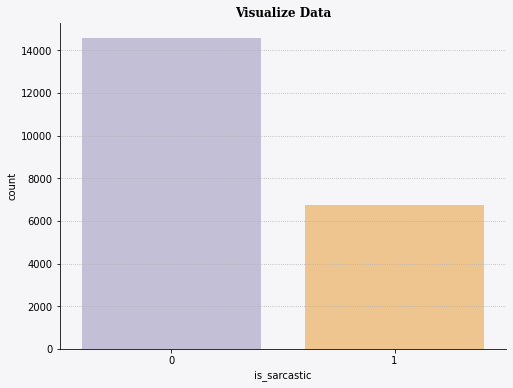

In [ ]:
Visualize_data(test)